<a id='top'></a>

# Webscraping of FBref Data
##### Notebook to scrape raw data  from [StatsBomb](https://statsbomb.com/) via [FBref](https://fbref.com/en/) using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/)

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 31/08/2020<br>
Notebook last updated: 26/12/2020

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook scrapes player statstics data from [StatsBomb](https://statsbomb.com/) via [FBref.com](https://fbref.com/en/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/FBref%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Summary](#section4)<br>
5.    [Next Steps](#section5)<br>
6.    [Bibliography](#section6)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables and Lists

#### Variables

In [3]:
# Datetime
import datetime
from datetime import date
import time

In [4]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

#### Lists

In [5]:
# Standard(stats)
stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 

# Goalkeeping(keepers)
keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
keepers3 = ["players_used","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]

# Advance goalkeeping(keepersadv)
keepersadv = ["player","nationality","position","squad","age","birth_year","minutes_90s_gk","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
keepersadv2 = ["minutes_90s_gk","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]

# Shooting(shooting)
shooting = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]

# Passing(passing)
passing = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]

# Passtypes(passing_types)
passing_types = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]

# Goal and shot creation(gca)
gca = ["player","nationality","position","squad","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]

# Defensive actions(defense)
defense = ["player","nationality","position","squad","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]

# Possession(possession)
possession = ["player","nationality","position","squad","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]

# Playingtime(playingtime)
playingtime = ["player","nationality","position","squad","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]

# Miscellaneous(misc)
misc = ["player","nationality","position","squad","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

### Define Filepaths

In [6]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Custom Functions

In [7]:
# The following code is from parth1902. His GitHub repository can be found here: https://github.com/parth1902/Scrape-FBref-data
# From this point, the code and comments are parth1902's

## Much of the scraping code is taken from this repository: https://github.com/chmartin/FBref_EPL
## I've made the the necessary changes for the recently added data and for combining it

# Functions to get the data in a DataFrame using BeautifulSoup

def get_tables(url):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    team_table = all_tables[0]
    player_table = all_tables[1]
    return player_table, team_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player

def get_frame_team(features, team_table):
    pre_df_squad = dict()
    #Note: features does not contain squad name, it requires special treatment
    features_wanted_squad = features
    rows_squad = team_table.find_all('tr')
    for row in rows_squad:
        if(row.find('th',{"scope":"row"}) != None):
            name = row.find('th',{"data-stat":"squad"}).text.strip().encode().decode("utf-8")
            if 'squad' in pre_df_squad:
                pre_df_squad['squad'].append(name)
            else:
                pre_df_squad['squad'] = [name]
            for f in features_wanted_squad:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_squad:
                    pre_df_squad[f].append(text)
                else:
                    pre_df_squad[f] = [text]
    df_squad = pd.DataFrame.from_dict(pre_df_squad)
    return df_squad

def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_player = get_frame(features, player_table)
    return df_player

def frame_for_category_team(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_team = get_frame_team(features, team_table)
    return df_team

In [8]:
# Function to get the player data for outfield player, includes all categories - standard stats, shooting passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats)
    df2 = frame_for_category('shooting',top,end,shooting2)
    df3 = frame_for_category('passing',top,end,passing2)
    df4 = frame_for_category('passing_types',top,end,passing_types2)
    df5 = frame_for_category('gca',top,end,gca2)
    df6 = frame_for_category('defense',top,end,defense2)
    df7 = frame_for_category('possession',top,end,possession2)
    df8 = frame_for_category('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [9]:
# Function to get keeping and advance goalkeeping data
def get_keeper_data(top,end):
    df1 = frame_for_category('keepers',top,end,keepers)
    df2 = frame_for_category('keepersadv',top,end,keepersadv2)
    df = pd.concat([df1, df2], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [10]:
# Function to get team-wise data accross all categories as mentioned above
def get_team_data(top,end):
    df1 = frame_for_category_team('stats',top,end,stats3)
    df2 = frame_for_category_team('keepers',top,end,keepers3)
    df3 = frame_for_category_team('keepersadv',top,end,keepersadv2)
    df4 = frame_for_category_team('shooting',top,end,shooting3)
    df5 = frame_for_category_team('passing',top,end,passing2)
    df6 = frame_for_category_team('passing_types',top,end,passing_types2)
    df7 = frame_for_category_team('gca',top,end,gca2)
    df8 = frame_for_category_team('defense',top,end,defense2)
    df9 = frame_for_category_team('possession',top,end,possession2)
    df10 = frame_for_category_team('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to scrape football data from [FBref](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

The aims of this notebook is to result in three, finalised datasets exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using Tableau, PowerBI, Microsoft Excel. These datasets are the following:
*    teams
*    outfield players
*    goalkeepers

These [FBref](https://fbref.com/en/) webscrapers specially include the recently added extensive data of the top five leagues. The code for the [FBref](https://fbref.com/en/)  web scraping was written by [this](https://github.com/parth1902/Scrape-FBref-data) repository by [parth1902](https://github.com/parth1902) which in turn was taken from [this](https://github.com/chmartin/FBref_EPL) repository written by [chmartin](https://github.com/chmartin).

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into three subsections - team, outfielder, and goalkeeper.

The data needs to be scraped, converted to a pandas DataFrame ([Section 3](#section3)) and cleaned in the Data Engineering section ([Section 4](#section4)).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

The FBref data comes in three forms:
*    team data
*    outfield data
*    keeper data

### <a id='#section3.2'>3.2. Teams</a>

#### <a id='#section3.2.1'>3.2.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |
| `games`    | float64    | <b>Matches Played</b>. Matches Played by the player or squad    |
| `games_starts`    | float64    | <b>Starts</b>. Game or games started by player    |
| `minutes`    | float64    | Minutes    |
| `goals`    | float64    | <b>Goals</b>. Goals scored or allowed    |
| `assists`    | float64    | Assists    |
| `pens_made`    | float64    | Penalty Kicks Made     |
| `pens_att`   | float64    | Penalty Kicks Attempted    |
| `cards_yellow`   | float64    | Yellow Cards    |
| `cards_red`   | float64    | Red Cards    |
| `goals_per90`   | float64    | Goals Scored per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader    |
| `assists_per90`   | float64    | Assists per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader    |
| `goals_assists_per90`   | float64    | Goals and Assists per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader    |
| `goals_pens_per90`   | float64    | Goals minus Penalty Kicks made per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader.    |
| `goals_assists_pens_per90`   | float64    | Goals plus Assists minus Penalty Kicks made per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader.    |
| `xg`   | float64    | Expected Goals. xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available.    |
| `npxg`   | float64    | npxG -- Non-Penalty Expected Goals. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available.    |
| `xa`   | float64    | Expected Assists. xG which follows a pass that assists a shot. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available.    |
| `xg_per90`   | float64    | Expected Goals per 90 minutes. xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `xa_per90`   | float64    | Expected Assists per 90 minutes. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `xg_xa_per90`   | float64    | Expected Goals plus Assist per 90 minutes.xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `npxg_per90`   | float64    | Non-Penalty Expected Goals per 90 minutes. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `npxg_xa_per90`   | float64    | Non-Penalty Expected Goals plus Expected Assists per 90 minutes. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `games_gk`   | float64    |     |
| `games_starts_gk`   | float64    |     |
| `minutes_gk`   | float64    |     |
| `goals_against_gk`   | float64    |     |
| `goals_against_per90_gk`   | float64    |     |
| `shots_on_target_against`   | float64    |     |
| `saves`   | float64    |     |
| `save_pct`   | float64    |     |
| `wins_gk`   | float64    |     |
| `draws_gk`   | float64    |     |
| `losses_gk`   | float64    |     |
| `clean_sheets`   | float64    |     |
| `clean_sheets_pct`   | float64    |     |
| `pens_att_gk`   | float64    |     |
| `pens_allowed`   | float64    |     |
| `pens_saved`   | float64    |     |
| `pens_missed_gk`   | float64    |     |
| `minutes_90s_gk`   | float64    |     |
| `free_kick_goals_against_gk`   | float64    |     |
| `corner_kick_goals_against_gk`   | float64    |     |
| `own_goals_against_gk`   | float64    |     |
| `psxg_gk`   | float64    |     |
| `psnpxg_per_shot_on_target_against`   | float64    |     |
| `psxg_net_gk`   | float64    |     |
| `psxg_net_per90_gk`   | float64    |     |
| `passes_completed_launched_gk`   | float64    |     |
| `passes_launched_gk`   | float64    |     |
| `passes_pct_launched_gk`   | float64    |     |
| `passes_gk`   | float64    |     |
| `passes_throws_gk`   | float64    |     |
| `pct_passes_launched_gk`   | float64    |     |
| `passes_length_avg_gk`   | float64    |     |
| `goal_kicks`   | float64    |     |
| `pct_goal_kicks_launched`   | float64    |     |
| `goal_kick_length_avg`   | float64    |     |
| `crosses_gk`   | float64    |     |
| `crosses_stopped_gk`   | float64    |     |
| `crosses_stopped_pct_gk`   | float64    |     |
| `def_actions_outside_pen_area_gk`   | float64    |     |
| `def_actions_outside_pen_area_per90_gk`   | float64    |     |
| `avg_distance_def_actions_gk`   | float64    |     |
| `shots_total`   | float64    |     |
| `shots_on_target`   | float64    |     |
| `shots_free_kicks`   | float64    |     |
| `shots_on_target_pct`   | float64    |     |
| `shots_total_per90`   | float64    |     |
| `shots_on_target_per90`   | float64    |     |
| `goals_per_shot`   | float64    |     |
| `goals_per_shot_on_target`   | float64    |     |
| `npxg_per_shot`   | float64    |     |
| `xg_net`   | float64    |     |
| `npxg_net`   | float64    |     |
| `passes_completed`   | float64    |     |
| `passes`   | float64    |     |
| `passes_pct`   | float64    |     |
| `passes_total_distance`   | float64    |     |
| `passes_progressive_distance`   | float64    |     |
| `passes_completed_short`   | float64    |     |
| `passes_short`   | float64    |     |
| `passes_pct_short`   | float64    |     |
| `passes_completed_medium`   | float64    |     |
| `passes_medium`   | float64    |     |
| `passes_pct_medium`   | float64    |     |
| `passes_completed_long`   | float64    |     |
| `passes_long`   | float64    |     |
| `passes_pct_long`   | float64    |     |
| `xa_net`   | float64    |     |
| `assisted_shots`   | float64    |     |
| `passes_into_final_third`   | float64    |     |
| `passes_into_penalty_area`   | float64    |     |
| `crosses_into_penalty_area`   | float64    |     |
| `progressive_passes`   | float64    |     |
| `passes_live`   | float64    |     |
| `passes_dead`   | float64    |     |
| `passes_free_kicks`   | float64    |     |
| `through_balls`   | float64    |     |
| `passes_pressure`   | float64    |     |
| `passes_switches`   | float64    |     |
| `crosses`   | float64    |     |
| `corner_kicks`   | float64    |     |
| `corner_kicks_in`   | float64    |     |
| `corner_kicks_out`   | float64    |     |
| `corner_kicks_straight`   | float64    |     |
| `passes_ground`   | float64    |     |
| `passes_low`   | float64    |     |
| `passes_high`   | float64    |     |
| `passes_left_foot`   | float64    |     |
| `passes_right_foot`   | float64    |     |
| `passes_head`   | float64    |     |
| `throw_ins`   | float64    |     |
| `passes_other_body`   | float64    |     |
| `passes_offsides`   | float64    |     |
| `passes_oob`   | float64    |     |
| `passes_intercepted`   | float64    |
| `passes_blocked`   | float64    |
| `sca`   | float64    |
| `sca_per90`   | float64    |
| `sca_passes_live`   | float64    |
| `sca_passes_dead`   | float64    |
| `sca_dribbles`   | float64    |
| `sca_shots`   | float64    |
| `sca_fouled`   | float64    |
| `gca`   | float64    |
| `gca_per90`   | float64    |
| `gca_passes_live`   | float64    |
| `gca_passes_dead`   | float64    |
| `gca_dribbles`   | float64    |
| `gca_shots`   | float64    |
| `gca_fouled`   | float64    |
| `gca_og_for`   | float64    |
| `tackles`   | float64    |
| `tackles_won`   | float64    |
| `tackles_def_3rd`   | float64    |
| `tackles_mid_3rd`   | float64    |
| `tackles_att_3rd`   | float64    |
| `dribble_tackles`   | float64    |
| `dribbles_vs`   | float64    |
| `dribble_tackles_pct`   | float64    |
| `dribbled_past`   | float64    |
| `pressures`   | float64    |
| `pressure_regains`   | float64    |
| `pressure_regain_pct`   | float64    |
| `pressures_def_3rd`   | float64    |
| `pressures_mid_3rd`   | float64    |
| `pressures_att_3rd`   | float64    |
| `blocks`   | float64    |
| `blocked_shots`   | float64    |
| `blocked_shots_saves`   | float64    |
| `blocked_passes`   | float64    |
| `interceptions`   | float64    |
| `clearances`   | float64    |
| `errors`   | float64    |
| `touches`   | float64    |
| `touches_def_pen_area`   | float64    |
| `touches_def_3rd`   | float64    |
| `touches_mid_3rd`   | float64    |
| `touches_att_3rd`   | float64    |
| `touches_att_pen_area`   | float64    |
| `touches_live_ball`   | float64    |
| `dribbles_completed`   | float64    |
| `dribbles`   | float64    |
| `dribbles_completed_pct`   | float64    |
| `players_dribbled_past`   | float64    |
| `nutmegs`   | float64    |
| `carries`   | float64    |
| `carry_distance`   | float64    |
| `carry_progressive_distance`   | float64    |
| `pass_targets`   | float64    |
| `passes_received`   | float64    |
| `passes_received_pct`   | float64    |
| `miscontrols`   | float64    |
| `dispossessed`   | float64    |
| `cards_yellow_red`   | float64    |
| `fouls`   | float64    |
| `fouled`   | float64    |
| `offsides`   | float64    |
| `pens_won`   | float64    |
| `pens_conceded`   | float64    |
| `own_goals`   | float64    |
| `ball_recoveries`   | float64    |
| `aerials_won`   | float64    |
| `aerials_lost`   | float64    |
| `aerials_won_pct`   | float64    |

<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

#### <a id='#section3.2.2'>3.2.2. Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the custom function `get_team_data`.

##### 20/21

In [14]:
# Run this script to scrape latest version of the team data from FBref for the Big 5 European Leagues for the 20/21 season

## Notes
### Go to the 'Standard stats' page of the league
### For Premier League 19/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
### Remove the 'stats', and pass the first and third part of the link as parameters like below


## Start timer
tic = datetime.datetime.now()


## Download data from the 'Top 5' leagues for the 20/21 season

### Premier League
df_fbref_team_premierleague_2021_raw = get_team_data('https://fbref.com/en/comps/9/10728/','/Premier-League-Stats')
df_fbref_team_premierleague_2021_raw['league_name'] = 'Premier League'
df_fbref_team_premierleague_2021_raw['league_country'] = 'England'

### Ligue 1
df_fbref_team_ligue1_2021_raw = get_team_data('https://fbref.com/en/comps/13/','/Ligue-1-Stats')
df_fbref_team_ligue1_2021_raw['league_name'] = 'Ligue 1'
df_fbref_team_ligue1_2021_raw['league_country'] = 'France'

### Bundesliga
df_fbref_team_bundesliga_2021_raw = get_team_data('https://fbref.com/en/comps/20/10737/','/Bundesliga-Stats')
df_fbref_team_bundesliga_2021_raw['league_name'] = 'Bundesliga'
df_fbref_team_bundesliga_2021_raw['league_country'] = 'Germany'

### Serie A
df_fbref_team_seriea_2021_raw = get_team_data('https://fbref.com/en/comps/11/','/Serie-A-Stats')
df_fbref_team_seriea_2021_raw['league_name'] = 'Serie A'
df_fbref_team_seriea_2021_raw['league_country'] = 'Italy'

### La Liga
df_fbref_team_laliga_2021_raw = get_team_data('https://fbref.com/en/comps/12/','/La-Liga-Stats')
df_fbref_team_laliga_2021_raw['league_name'] = 'La Liga'
df_fbref_team_laliga_2021_raw['league_country'] = 'Spain'


## End timer
toc = datetime.datetime.now()


## Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_big5_2021_raw = pd.concat([df_fbref_team_premierleague_2021_raw , df_fbref_team_ligue1_2021_raw, df_fbref_team_bundesliga_2021_raw, df_fbref_team_seriea_2021_raw , df_fbref_team_laliga_2021_raw])


## Export DataFrame to CSV

### Individual Leagues
df_fbref_team_premierleague_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/premierleague/archive/' + f'team_premierleague_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_team_premierleague_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/premierleague/' + f'team_premierleague_2021_raw_latest.csv', index=None, header=True)
df_fbref_team_ligue1_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/ligue1/archive/' + f'team_ligue1_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_team_ligue1_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/ligue1/' + f'team_ligue1_2021_raw_latest.csv', index=None, header=True)
df_fbref_team_bundesliga_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/bundesliga/archive/' + f'team_bundesliga_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_team_bundesliga_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/bundesliga/' + f'team_bundesliga_2021_raw_latest.csv', index=None, header=True)
df_fbref_team_seriea_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/seriea/archive/' + f'team_seriea_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_team_seriea_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/seriea/' + f'team_seriea_2021_raw_latest.csv', index=None, header=True)
df_fbref_team_laliga_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/laliga/archive/' + f'team_laliga_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_team_laliga_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/laliga/' + f'team_laliga_2021_raw_latest.csv', index=None, header=True)

### Combined
df_fbref_team_big5_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/archive/' + f'team_big5_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_team_big5_2021_raw.to_csv(data_dir_fbref + f'/raw/team/2021/' + f'team_big5_2021_raw_latest.csv', index=None, header=True)


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape team data for the Big 5 leagues for the 20/21 season is: {total_time/60:0.2f} minutes.')

Time taken to scrape team data for the Big 5 leagues for the 20/21 season is: 0.65 minutes.


##### 19/20

In [15]:
# Run this script to scrape the team data from FBref for the Big 5 European Leagues for the 19/20 season

## Start timer
tic = datetime.datetime.now()


## Download data from the 'Top 5' leagues for the 19/20 season

### Premier League
df_fbref_team_premierleague_1920_raw = get_team_data('https://fbref.com/en/comps/9/','/2019-2020-Premier-League-Stats')
df_fbref_team_premierleague_1920_raw['league_name'] = 'Premier League'
df_fbref_team_premierleague_1920_raw['league_country'] = 'England'
df_fbref_team_premierleague_1920_raw.to_csv(data_dir_fbref + '/raw/team/1920/premierleague/' + 'team_premierleague_1920_raw.csv', index=None, header=True)

### Ligue 1
df_fbref_team_ligue1_1920_raw = get_team_data('https://fbref.com/en/comps/13/3243/','/2019-2020-Ligue-1-Stats')
df_fbref_team_ligue1_1920_raw['league_name'] = 'Ligue 1'
df_fbref_team_ligue1_1920_raw['league_country'] = 'France'
df_fbref_team_ligue1_1920_raw.to_csv(data_dir_fbref + '/raw/team/1920/ligue1/' + 'team_ligue1_1920_raw.csv', index=None, header=True)

### Bundesliga
df_fbref_team_bundesliga_1920_raw = get_team_data('https://fbref.com/en/comps/20/','/2019-2020-Bundesliga-Stats')
df_fbref_team_bundesliga_1920_raw['league_name'] = 'Bundesliga'
df_fbref_team_bundesliga_1920_raw['league_country'] = 'Germany'
df_fbref_team_bundesliga_1920_raw.to_csv(data_dir_fbref + '/raw/team/1920/bundesliga/' + 'team_bundesliga_1920_raw.csv', index=None, header=True)

### Serie A
df_fbref_team_seriea_1920_raw = get_team_data('https://fbref.com/en/comps/11/','/2019-2020-Serie-A-Stats')
df_fbref_team_seriea_1920_raw['league_name'] = 'Serie A'
df_fbref_team_seriea_1920_raw['league_country'] = 'Italy'
df_fbref_team_seriea_1920_raw.to_csv(data_dir_fbref + '/raw/team/1920/seriea/' + 'team_seriea_1920_raw.csv', index=None, header=True)

### La Liga
df_fbref_team_laliga_1920_raw = get_team_data('https://fbref.com/en/comps/12/','/2019-2020-La-Liga-Stats')
df_fbref_team_laliga_1920_raw['league_name'] = 'La Liga'
df_fbref_team_laliga_1920_raw['league_country'] = 'Spain'
df_fbref_team_laliga_1920_raw.to_csv(data_dir_fbref + '/raw/team/1920/laliga/' + 'team_laliga_1920_raw.csv', index=None, header=True)

### Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_big5_1920_raw = pd.concat([df_fbref_team_premierleague_1920_raw , df_fbref_team_ligue1_1920_raw, df_fbref_team_bundesliga_1920_raw, df_fbref_team_seriea_1920_raw , df_fbref_team_laliga_1920_raw])
df_fbref_team_big5_1920_raw.to_csv(data_dir_fbref + '/raw/team/1920/combined/' + 'team_big5_1920_raw.csv', index=None, header=True)



## End timer
toc = datetime.datetime.now()


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape team data for the Big 5 leagues for the 19/20 season is: {total_time/60:0.2f} minutes.')

Time taken to scrape team data for the Big 5 leagues for the 19/20 season is: 3.60 minutes.


##### 18/19

In [16]:
# Run this script to scrape the team data from FBref for the Big 5 European Leagues for the 18/19 season

## Start timer
tic = datetime.datetime.now()


## Download data from the 'Top 5' leagues for the 18/19 season

### Premier League
df_fbref_team_premierleague_1819_raw = get_team_data('https://fbref.com/en/comps/9/1889/','/2018-2019-Premier-League-Stats')
df_fbref_team_premierleague_1819_raw['league_name'] = 'Premier League'
df_fbref_team_premierleague_1819_raw['league_country'] = 'England'
df_fbref_team_premierleague_1819_raw.to_csv(data_dir_fbref + '/raw/team/1819/premierleague/' + 'team_premierleague_1819_raw.csv', index=None, header=True)

### Ligue 1
df_fbref_team_ligue1_1819_raw = get_team_data('https://fbref.com/en/comps/13/2104/','/2018-2019-Ligue-1-Stats')
df_fbref_team_ligue1_1819_raw['league_name'] = 'Ligue 1'
df_fbref_team_ligue1_1819_raw['league_country'] = 'France'
df_fbref_team_ligue1_1819_raw.to_csv(data_dir_fbref + '/raw/team/1819/ligue1/' + 'team_ligue1_1819_raw.csv', index=None, header=True)

### Bundesliga
df_fbref_team_bundesliga_1819_raw = get_team_data('https://fbref.com/en/comps/20/2109/','/2018-2019-Bundesliga-Stats')
df_fbref_team_bundesliga_1819_raw['league_name'] = 'Bundesliga'
df_fbref_team_bundesliga_1819_raw['league_country'] = 'Germany'
df_fbref_team_bundesliga_1819_raw.to_csv(data_dir_fbref + '/raw/team/1819/bundesliga/' + 'team_bundesliga_1819_raw.csv', index=None, header=True)

### Serie A
df_fbref_team_seriea_1819_raw = get_team_data('https://fbref.com/en/comps/11/1896/','/2018-2019-Serie-A-Stats')
df_fbref_team_seriea_1819_raw['league_name'] = 'Serie A'
df_fbref_team_seriea_1819_raw['league_country'] = 'Italy'
df_fbref_team_seriea_1819_raw.to_csv(data_dir_fbref + '/raw/team/1819/seriea/' + 'team_seriea_1819_raw.csv', index=None, header=True)

### La Liga
df_fbref_team_laliga_1819_raw = get_team_data('https://fbref.com/en/comps/12/1886/','/2018-2019-La-Liga-Stats')
df_fbref_team_laliga_1819_raw['league_name'] = 'La Liga'
df_fbref_team_laliga_1819_raw['league_country'] = 'Spain'
df_fbref_team_laliga_1819_raw.to_csv(data_dir_fbref + '/raw/team/1819/laliga/' + 'team_laliga_1819_raw.csv', index=None, header=True)

### Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_big5_1819_raw = pd.concat([df_fbref_team_premierleague_1819_raw , df_fbref_team_ligue1_1819_raw, df_fbref_team_bundesliga_1819_raw, df_fbref_team_seriea_1819_raw , df_fbref_team_laliga_1819_raw])
df_fbref_team_big5_1819_raw.to_csv(data_dir_fbref + '/raw/team/1819/combined/' + 'team_big5_1819_raw.csv', index=None, header=True)


## End timer
toc = datetime.datetime.now()


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape team data for the Big 5 leagues for the 18/19 season is: {total_time/60:0.2f} minutes.')

Time taken to scrape team data for the Big 5 leagues for the 18/19 season is: 3.10 minutes.


##### 17/18

In [17]:
# Run this script to scrape the team data from FBref for the Big 5 European Leagues for the 17/18 season

## Start timer
tic = datetime.datetime.now()


## Download data from the 'Top 5' leagues for the 17/18 season

### Premier League
df_fbref_team_premierleague_1718_raw = get_team_data('https://fbref.com/en/comps/9/1631/','/2017-2018-Premier-League-Stats')
df_fbref_team_premierleague_1718_raw['league_name'] = 'Premier League'
df_fbref_team_premierleague_1718_raw['league_country'] = 'England'
df_fbref_team_premierleague_1718_raw.to_csv(data_dir_fbref + '/raw/team/1718/premierleague/' + 'team_premierleague_1718_raw.csv', index=None, header=True)

### Ligue 1
df_fbref_team_ligue1_1718_raw = get_team_data('https://fbref.com/en/comps/13/1632/','/2017-2018-Ligue-1-Stats')
df_fbref_team_ligue1_1718_raw['league_name'] = 'Ligue 1'
df_fbref_team_ligue1_1718_raw['league_country'] = 'France'
df_fbref_team_ligue1_1718_raw.to_csv(data_dir_fbref + '/raw/team/1718/ligue1/' + 'team_ligue1_1718_raw.csv', index=None, header=True)

### Bundesliga
df_fbref_team_bundesliga_1718_raw = get_team_data('https://fbref.com/en/comps/20/1634/','/2017-2018-Bundesliga-Stats')
df_fbref_team_bundesliga_1718_raw['league_name'] = 'Bundesliga'
df_fbref_team_bundesliga_1718_raw['league_country'] = 'Germany'
df_fbref_team_bundesliga_1718_raw.to_csv(data_dir_fbref + '/raw/team/1718/bundesliga/' + 'team_bundesliga_1718_raw.csv', index=None, header=True)

### Serie A
df_fbref_team_seriea_1718_raw = get_team_data('https://fbref.com/en/comps/11/1640/','/2017-2018-Serie-A-Stats')
df_fbref_team_seriea_1718_raw['league_name'] = 'Serie A'
df_fbref_team_seriea_1718_raw['league_country'] = 'Italy'
df_fbref_team_seriea_1718_raw.to_csv(data_dir_fbref + '/raw/team/1718/seriea/' + 'team_seriea_1718_raw.csv', index=None, header=True)

### La Liga
df_fbref_team_laliga_1718_raw = get_team_data('https://fbref.com/en/comps/12/1652/','/2017-2018-La-Liga-Stats')
df_fbref_team_laliga_1718_raw['league_name'] = 'La Liga'
df_fbref_team_laliga_1718_raw['league_country'] = 'Spain'
df_fbref_team_laliga_1718_raw.to_csv(data_dir_fbref + '/raw/team/1718/laliga/' + 'team_laliga_1718_raw.csv', index=None, header=True)

### Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_big5_1718_raw = pd.concat([df_fbref_team_premierleague_1718_raw , df_fbref_team_ligue1_1718_raw, df_fbref_team_bundesliga_1718_raw, df_fbref_team_seriea_1718_raw , df_fbref_team_laliga_1718_raw])
df_fbref_team_big5_1718_raw.to_csv(data_dir_fbref + '/raw/team/1718/combined/' + 'team_big5_1718_raw.csv', index=None, header=True)


## End timer
toc = datetime.datetime.now()


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape team data for the Big 5 leagues for the 17/18 season is: {total_time/60:0.2f} minutes.')

Time taken to scrape team data for the Big 5 leagues for the 17/18 season is: 3.24 minutes.


#### <a id='#section3.2.3'>3.2.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [18]:
# Display the first 5 rows of the raw DataFrame, df_fbref_team_big5_2021_raw
df_fbref_team_big5_2021_raw.head()

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,league_name,league_country
0,vs Arsenal,25.0,48.1,15.0,165.0,1350.0,16.0,11.0,0.0,1.0,...,18.0,1.0,3.0,0.0,1260.0,238.0,186.0,56.1,Premier League,England
1,vs Aston Villa,19.0,49.2,13.0,143.0,1170.0,13.0,9.0,0.0,1.0,...,13.0,1.0,4.0,1.0,1150.0,253.0,311.0,44.9,Premier League,England
2,vs Brighton,22.0,46.0,15.0,165.0,1350.0,23.0,16.0,5.0,5.0,...,27.0,4.0,5.0,1.0,1302.0,265.0,214.0,55.3,Premier League,England
3,vs Burnley,21.0,59.0,14.0,154.0,1260.0,19.0,15.0,3.0,3.0,...,31.0,3.0,0.0,1.0,1480.0,294.0,351.0,45.6,Premier League,England
4,vs Chelsea,27.0,40.7,15.0,165.0,1350.0,17.0,11.0,2.0,2.0,...,25.0,2.0,5.0,1.0,1334.0,209.0,260.0,44.6,Premier League,England


In [19]:
# Display the last 5 rows of the raw DataFrame, df_fbref_team_big5_2021_raw
df_fbref_team_big5_2021_raw.tail()

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,league_name,league_country
35,Real Sociedad,27.0,56.2,16.0,176.0,1440.0,25.0,13.0,6.0,7.0,...,46.0,3.0,3.0,0.0,1489.0,311.0,278.0,52.8,La Liga,Spain
36,Sevilla,25.0,63.2,13.0,143.0,1170.0,14.0,10.0,2.0,2.0,...,25.0,1.0,0.0,1.0,1090.0,250.0,212.0,54.1,La Liga,Spain
37,Valencia,24.0,41.3,15.0,165.0,1350.0,20.0,12.0,5.0,5.0,...,38.0,3.0,4.0,1.0,1205.0,243.0,252.0,49.1,La Liga,Spain
38,Valladolid,25.0,41.7,15.0,165.0,1350.0,15.0,9.0,4.0,5.0,...,31.0,5.0,5.0,0.0,1287.0,237.0,323.0,42.3,La Liga,Spain
39,Villarreal,25.0,57.6,15.0,165.0,1350.0,20.0,11.0,5.0,5.0,...,43.0,4.0,3.0,1.0,1269.0,202.0,227.0,47.1,La Liga,Spain


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [20]:
# Print the shape of the raw DataFrame, df_fbref_team_big5_2021_raw
print(df_fbref_team_big5_2021_raw.shape)

(196, 190)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [21]:
# Features (column names) of the raw DataFrame, df_fbref_team_big5_2021_raw
df_fbref_team_big5_2021_raw.columns

Index(['squad', 'players_used', 'possession', 'games', 'games_starts',
       'minutes', 'goals', 'assists', 'pens_made', 'pens_att',
       ...
       'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries',
       'aerials_won', 'aerials_lost', 'aerials_won_pct', 'league_name',
       'league_country'],
      dtype='object', length=190)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [22]:
# Data types of the features of the raw DataFrame, df_fbref_team_big5_2021_raw
df_fbref_team_big5_2021_raw.dtypes

squad               object
players_used       float64
possession         float64
games              float64
games_starts       float64
                    ...   
aerials_won        float64
aerials_lost       float64
aerials_won_pct    float64
league_name         object
league_country      object
Length: 190, dtype: object

In [23]:
# Displays all one hundered and four columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_team_big5_2021_raw.dtypes)

squad                                     object
players_used                             float64
possession                               float64
games                                    float64
games_starts                             float64
minutes                                  float64
goals                                    float64
assists                                  float64
pens_made                                float64
pens_att                                 float64
cards_yellow                             float64
cards_red                                float64
goals_per90                              float64
assists_per90                            float64
goals_assists_per90                      float64
goals_pens_per90                         float64
goals_assists_pens_per90                 float64
xg                                       float64
npxg                                     float64
xa                                       float64
xg_per90            

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [24]:
# Info for the raw DataFrame, df_fbref_team_big5_2021_raw
df_fbref_team_big5_2021_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 39
Columns: 190 entries, squad to league_country
dtypes: float64(187), object(3)
memory usage: 292.5+ KB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [25]:
# Description of the raw DataFrame, df_fbref_team_big5_2021_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_team_big5_2021_raw.describe()

,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.00000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,24.714286,50.000510,14.591837,160.510204,1313.265306,20.163265,13.867347,2.591837,3.102041,30.081633,...,192.040816,182.275510,28.071429,2.44898,2.928571,0.673469,1312.826531,240.938776,240.928571,49.999490
std,2.694724,6.954523,1.372527,15.097797,123.527433,6.483421,5.194944,1.726634,1.875564,7.491087,...,30.371180,28.435904,9.513553,1.57625,1.743854,0.768288,153.142067,57.309921,57.275627,4.208983
min,19.000000,34.400000,13.000000,143.000000,1170.000000,4.000000,3.000000,0.000000,0.000000,10.000000,...,114.000000,108.000000,10.000000,0.00000,0.000000,0.000000,855.000000,124.000000,124.000000,38.600000
25%,23.000000,44.800000,13.000000,143.000000,1170.000000,15.000000,10.000000,1.000000,2.000000,25.000000,...,169.750000,161.000000,21.000000,1.00000,2.000000,0.000000,1221.250000,196.500000,196.500000,47.075000
50%,25.000000,50.000000,14.000000,154.000000,1260.000000,20.000000,13.500000,2.000000,3.000000,30.000000,...,190.500000,181.000000,27.000000,2.00000,3.000000,1.000000,1312.500000,238.000000,238.000000,50.000000
75%,26.000000,55.200000,15.000000,165.000000,1350.000000,25.000000,17.000000,4.000000,4.000000,35.000000,...,216.000000,206.000000,33.000000,3.00000,4.000000,1.000000,1421.250000,282.000000,282.000000,52.925000
max,33.000000,65.600000,17.000000,187.000000,1530.000000,39.000000,33.000000,9.000000,9.000000,54.000000,...,271.000000,255.000000,71.000000,8.00000,9.000000,3.000000,1694.000000,445.000000,445.000000,61.400000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

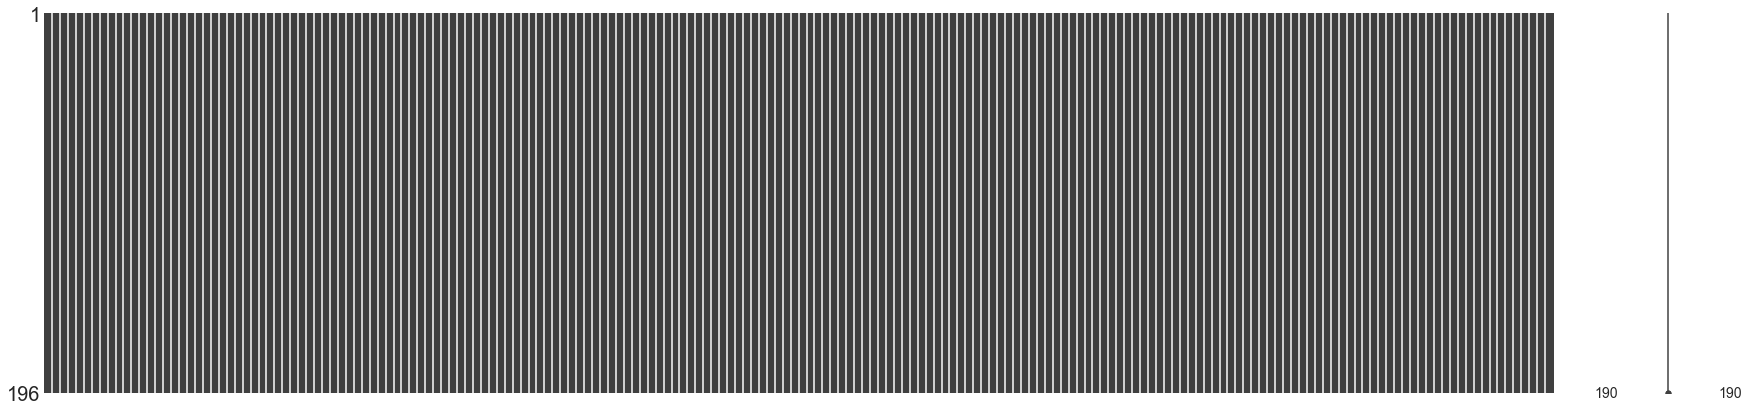

In [26]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_team_big5_2021_raw
msno.matrix(df_fbref_team_big5_2021_raw, figsize = (30, 7))

In [27]:
# Counts of missing values
null_value_stats = df_fbref_team_big5_2021_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there are no missing values in the dataset.

### <a id='#section3.3'>3.3. Outfield Players</a>

#### <a id='#section3.3.1'>3.3.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |


<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

#### <a id='#section3.3.2'>3.3.2. Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the function `get_outfield_data`.

For outfielders, we are not required to download the data for individual leagues and concatenate them, they can be downloaded as one from the 'Big 5' European leagues players page.

In [ ]:
# Run this script to scrape latest version of the player data from FBref

## Notes
### Go to the 'Standard stats' page of the league
### For the Big 5 European Leagues for 2020/21, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
### For the Big 5 European Leagues for 2019/20, the link is this: https://fbref.com/en/comps/Big5/2019-2020/stats/players/2019-2020-Big-5-European-Leagues-Stats
### Remove the 'stats', and pass the first and third part of the link as parameters like below


## Start timer
tic = datetime.datetime.now()


## 20/21
df_fbref_outfield_big5_2021_raw = get_outfield_data('https://fbref.com/en/comps/Big5/','/players/Big-5-European-Leagues-Stats')
df_fbref_outfield_big5_2021_raw.to_csv(data_dir_fbref + f'/raw/outfield/2021/archive/' + f'player_big5_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_outfield_big5_2021_raw.to_csv(data_dir_fbref + f'/raw/outfield/2021/' + f'player_big5_2021_raw_latest.csv', index=None, header=True)

## 19/20
df_fbref_outfield_big5_1920_raw = get_outfield_data('https://fbref.com/en/comps/Big5/2019-2020/','/players/2019-2020-Big-5-European-Leagues-Stats')
df_fbref_outfield_big5_1920_raw.to_csv(data_dir_fbref + '/raw/outfield/1920/' + 'player_big5_1920_raw.csv', index=None, header=True)

## 18/19
df_fbref_outfield_big5_1819_raw = get_outfield_data('https://fbref.com/en/comps/Big5/2018-2019/','/players/2018-2019-Big-5-European-Leagues-Stats')
df_fbref_outfield_big5_1819_raw.to_csv(data_dir_fbref + '/raw/outfield/1819/' + 'player_big5_1819_raw.csv', index=None, header=True)

## 17/18
df_fbref_outfield_big5_1718_raw = get_outfield_data('https://fbref.com/en/comps/Big5/2017-2018/','/players/2017-2018-Big-5-European-Leagues-Stats')
df_fbref_outfield_big5_1718_raw.to_csv(data_dir_fbref + '/raw/outfield/1718/' + 'player_big5_1718_raw.csv', index=None, header=True)


## End timer
toc = datetime.datetime.now()


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape player data for the Big 5 leagues is: {total_time/60:0.2f} minutes.')

#### <a id='#section3.3.3'>3.3.3. Preliminary Data Handling</a>
Let's quality of the dataset for the 2020/21 season by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [ ]:
# Display the first 5 rows of the raw DataFrame, df_fbref_outfield_big5_2021_raw
df_fbref_outfield_big5_2021_raw.head()

In [ ]:
# Display the last 5 rows of the raw DataFrame, df_fbref_outfield_big5_2021_raw
df_fbref_outfield_big5_2021_raw.tail()

[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [ ]:
# Print the shape of the raw DataFrame, df_fbref_outfield_big5_2021
print(df_fbref_outfield_big5_2021_raw.shape)

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [ ]:
# Features (column names) of the raw DataFrame, df_fbref_outfield_big5_2021_raw
df_fbref_outfield_big5_2021_raw.columns

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [ ]:
# Data types of the features of the raw DataFrame, df_fbref_outfield_big5_2021_raw
df_fbref_outfield_big5_2021_raw.dtypes

In [ ]:
# Displays all one hundered and four columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_outfield_big5_2021_raw.dtypes)

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [ ]:
# Info for the raw DataFrame, df_fbref_outfield_big5_2021_raw
df_fbref_outfield_big5_2021_raw.info()

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [ ]:
# Description of the raw DataFrame, df_fbref_outfield_big5_2021_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_outfield_big5_2021_raw.describe()

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

In [ ]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_outfield_big5_2021_raw
msno.matrix(df_fbref_outfield_big5_2021_raw, figsize = (30, 7))

In [ ]:
# Counts of missing values
null_value_stats = df_fbref_outfield_big5_2021_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

The visualisation shows us very quickly that there are no missing values in the dataset.

### <a id='#section3.4'>3.4. Goalkeepers</a>

#### <a id='#section3.4.1'>3.4.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |


<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

#### <a id='#section3.4.2'>3.4.2. Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the function `get_keeper_data`.

Like the outfielders, to download the goalkeeper data we are not required to download the data for individual leagues and concatenate them, they can be downloaded as one from the 'Big 5' European leagues goalkeepers page.

In [ ]:
# Run this script to scrape latest version of the goalkeeper data from FBref

## Notes
### Go to the 'Standard stats' page of the league
### For the Big 5 European Leagues for 2020/21, the link is this: https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats
### For the Big 5 European Leagues for 2019/20, the link is this: https://fbref.com/en/comps/Big5/2019-2020/stats/players/2019-2020-Big-5-European-Leagues-Stats
### Remove the 'stats', and pass the first and third part of the link as parameters like below


## Start timer
tic = datetime.datetime.now()


## Download goalkeeper data from the 'Top 5' leagues for the 19/20 season

### 20/21
df_fbref_goalkeeper_big5_2021_raw = get_keeper_data('https://fbref.com/en/comps/Big5/','/players/Big-5-European-Leagues-Stats')
df_fbref_outfield_big5_2021_raw.to_csv(data_dir_fbref + f'/raw/outfield/2021/archive/' + f'player_big5_2021_raw_last_updated_{today}.csv', index=None, header=True)
df_fbref_outfield_big5_2021_raw.to_csv(data_dir_fbref + f'/raw/outfield/2021/' + f'player_big5_2021_raw_latest.csv', index=None, header=True)

### 19/20
df_fbref_goalkeeper_big5_1920_raw = get_keeper_data('https://fbref.com/en/comps/Big5/2019-2020/','/players/2019-2020-Big-5-European-Leagues-Stats')
df_fbref_goalkeeper_big5_1920_raw.to_csv(data_dir_fbref + '/raw/goalkeeper/1920/' + 'goalkeeper_big5_1920_raw.csv', index=None, header=True)

### 18/19
df_fbref_goalkeeper_big5_1819_raw = get_keeper_data('https://fbref.com/en/comps/Big5/2018-2019/','/players/2018-2019-Big-5-European-Leagues-Stats')
df_fbref_goalkeeper_big5_1819_raw.to_csv(data_dir_fbref + '/raw/goalkeeper/1819/' + 'goalkeeper_big5_1819_raw.csv', index=None, header=True)

### 17/18
df_fbref_goalkeeper_big5_1718_raw = get_keeper_data('https://fbref.com/en/comps/Big5/2017-2018/','/players/2017-2018-Big-5-European-Leagues-Stats')
df_fbref_goalkeeper_big5_1718_raw.to_csv(data_dir_fbref + '/raw/goalkeeper/1718/' + 'goalkeeper_big5_1718_raw.csv', index=None, header=True)


## End timer
toc = datetime.datetime.now()


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape goalkeeper data for the Big 5 leagues is: {total_time:0.2f} seconds.')

#### <a id='#section3.4.3'>3.4.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [ ]:
# Display the first 5 rows of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
df_fbref_goalkeeper_big5_2021_raw.head()

In [ ]:
# Display the last 5 rows of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
df_fbref_goalkeeper_big5_2021_raw.tail()

[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [ ]:
# Print the shape of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
print(df_fbref_goalkeeper_big5_2021_raw.shape)

The raw DataFrame has:
*    744 observations (rows), each observation represents one individual tourist stranded in Peru, and
*    20 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [ ]:
# Features (column names) of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
df_fbref_goalkeeper_big5_2021_raw.columns

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [ ]:
# Data types of the features of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
df_fbref_goalkeeper_big5_2021_raw.dtypes

In [ ]:
# Displays all one hundered and four columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_goalkeeper_big5_2021_raw.dtypes)

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [ ]:
# Info for the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
df_fbref_goalkeeper_big5_2021_raw.info()

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [ ]:
# Description of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_goalkeeper_big5_2021_raw.describe()

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

In [ ]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_goalkeeper_big5_2021_raw
msno.matrix(df_fbref_goalkeeper_big5_2021_raw, figsize = (30, 7))

In [ ]:
# Counts of missing values
null_value_stats = df_fbref_goalkeeper_big5_2021_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

The visualisation shows us very quickly that there are no missing values in the dataset.

## <a id='#section4'>4. Summary</a>
This notebook scrapes player statstics data from [StatsBomb](https://statsbomb.com/) via [FBref.com](https://fbref.com/en/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

With this notebook we now have aggregated player performance data for players in the 'Big 5' European leagues for the 17/18-present seasons.

## <a id='#section5'>5. Next Steps</a>
This data is now ready to be exported and analysed in further Jupyter notebooks or Tableau.

The Data Engineering subfolder in GitHub can be found [here](https://github.com/eddwebster/football_analytics/tree/master/notebooks/B\)%20Data%20Engineering) and a static version of the record linkage notebook in which the FBref data is joined to TransferMarkt data can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/B%29%20Data%20Engineering/Record%20Linkage%20of%20FBref%20and%20TransferMarkt%20Datasets.ipynb).

## <a id='#section6'>6. References</a>

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref
*    [FBref_EPL GitHub repository](https://github.com/chmartin/FBref_EPL) by [chmartin](https://github.com/chmartin) for the original web scraping code
*    [Scrape-FBref-data GitHub repository](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902) for the revised web scraping code for the new FBref metrics


#### Countries
*    [Comparison of alphabetic country codes Wiki](https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes)

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)